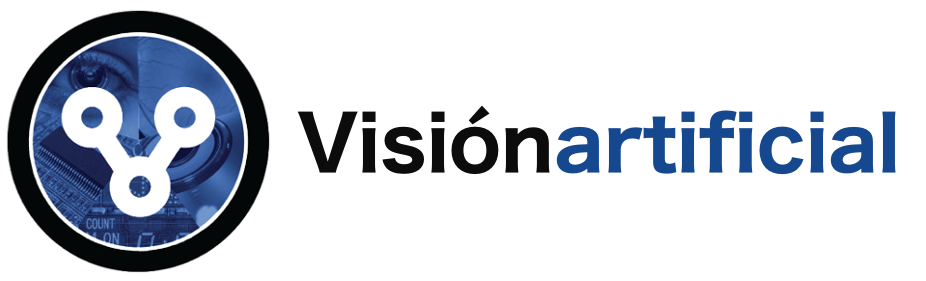

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.
<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detección de bordes</font>

## <font style="color:rgb(50,120,229)"> Repaso</font>

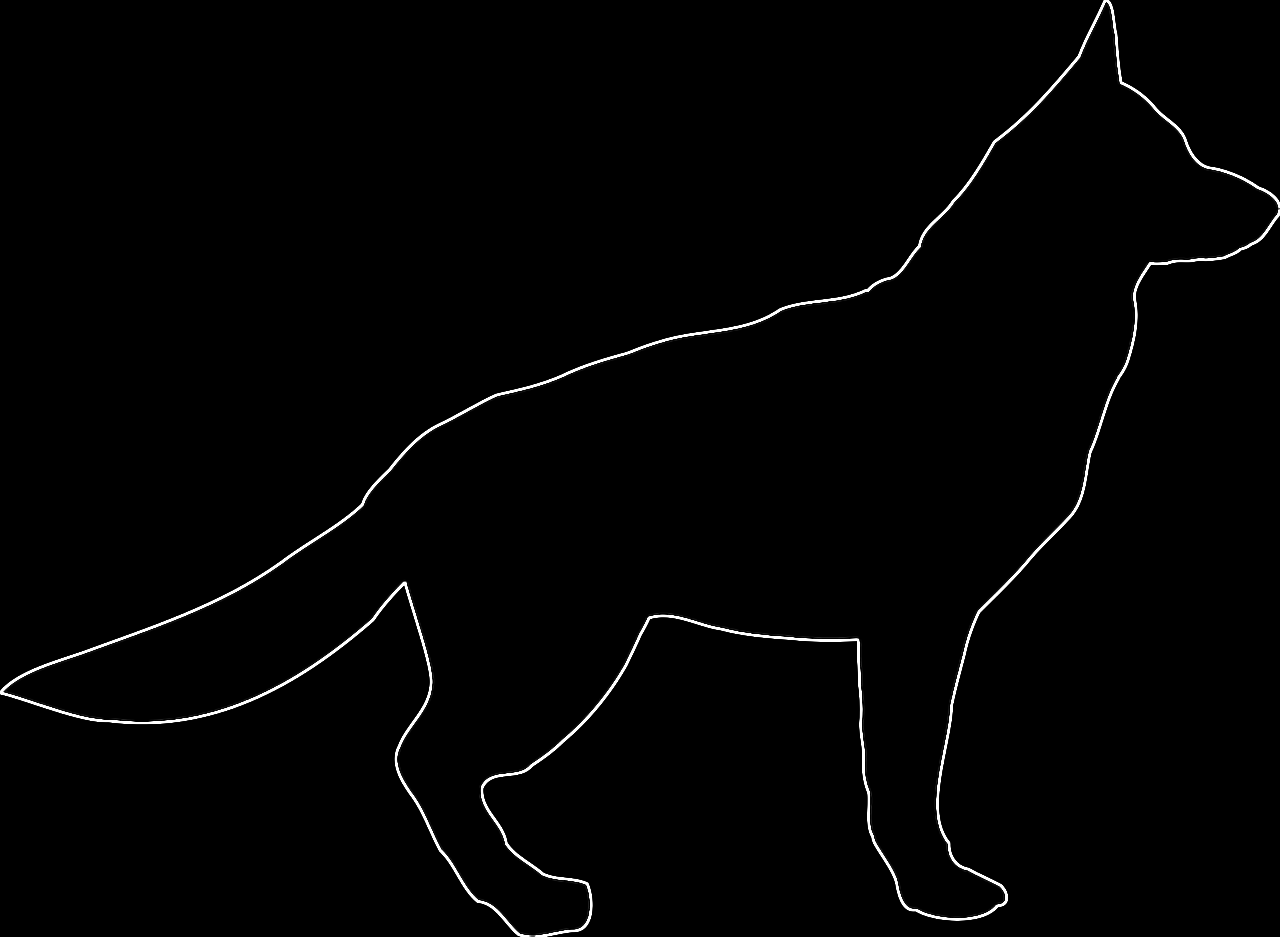

Podes identificar ao animal da imaxe superior? Sorprendentemente, todo o mundo pode. Aínda que a información da imaxe anterior é inferior en varios ordes de magnitude á información contida nunha imaxe dun can, aínda podemos dicir que é este animal.

Mentres procesamos imaxes, queremos simplificar ao máximo a información contida nela para que sexa máis doado procesalas para algoritmos de visión e aprendizaxe. A detección de bordes ofrece esta posibilidade e, polo tanto, é unha das operacións de baixo nivel máis comúns en Visión Artificial.

Na detección de bordes, dada unha imaxe, creamos unha segunda imaxe **binaria** que é negra (valor de píxel = 0) en todas partes agás nos bordes. Para os nosos propósitos, os bordes definiranse como píxeles aqueles píxeles que pertencen ao unha discontinuidade de intensidade brusca.


## <font style="color:rgb(50,120,229)">Detección de bordes con Canny</font>

**A detección de bordes con Canny** é unha das operacións máis empregadas. Para moitas das aplicacións que se require a detección de bordes, Canny é suficiente.

A detección de bordes con Canny ten os seguintes tres pasos:

1. **Cálculo do gradiente:** Os bordes son píxeles onde a intensidade cambia bruscamente. Por cadernis anteriores, sabemos que a magnitude do gradiente é moi alta nos píxeles de borde. Polo tanto, o cálculo de gradiente é o primeiro paso na detección de Canny.

2. **Supresión non máxima:** No mundo real, os bordos dunha imaxe non son nítidos. A magnitude do gradiente é moi alta non só no lugar real do borde, senón tamén nunha pequena vecindade do mesmo. Idealmente, queremos que un bordo estea representado por un único contorno fino de píxeles. Simplemente establecendo un limiar no gradiente non é suficiente posto que nos leva a un contorno cunha anchura de varios píxeles.

      Afortunadamente, este problema pódese eliminar seleccionando o píxel con magnitude de gradiente máximo nunha contorna pequena (digamos de 3x3) de cada píxel. O nome de supresión non-máximos provén do feito de que eliminamos (establecemos a cero) todos os gradientes, excepto o máximo nunha vecindade de 3x3 segundo a dirección do gradiente.

3. **Limiar de histéresis:** Despois da supresión de non-máximos, poderiamos limiar a imaxe de gradiente para obter unha nova imaxe binaria que sexa negra en todos os lugares excepto nos píxeles onde o gradiente é moi alto. Este tipo de limiar excluiría moitos puntos de bordes porque, nas imaxes reais, non todos os puntos pertencenes ao borde teñen valores altos do gradiente (depende da iluminación da imaxe). Polo tanto, provocaríamos unha discontinuidade no borde.

      Para solucionar este problema, Canny emprega **dous limiares**. En primeiro lugar, úsase un limiar alto para seleccionar píxeles con gradientes moi altos. Dicimos que estes píxeles teñen un borde forte. En segundo lugar, úsase un segundo limiar inferior para obter novos píxeles que son píxeles potenciais de borde. Dicimos que estes píxeles teñen un borde débil. Un píxel de borde débil pode clasificarse de novo como un bordo forte se un dos seus veciños é un borde forte. Os bordos débiles que non se reclasificaron como fortes son eliminados do mapa de bordes final.



**<font style="color:rgb(255,0,0)">Note:</font>** Acorde a Wikipedia, a palabra [hysteresis](https://en.wikipedia.org/wiki/Hysteresis) significa "a dependencia do estado dun sistema da súa historia". No limiar, é a dependencia do estado (borde/non borde) dun píxel en función do seu veciño.

## <font style="color:rgb(50,120,229)">etector de Canny en OpenCV</font>

A continuación amosamos o uso do detector de [**`Canny`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af).

#### <font style="color:rgb(8,133,37)">Sintaxe da Función</font>

```python
edges	=	cv.Canny(	dx, dy, threshold1, threshold2[, edges[, L2gradient]]	)
```

**Parameters**
- **`dx`**	Derivada x  (16 bits) da imaxe de entrada (CV_16SC1 or CV_16SC3).
- **`dy`**	Derivada y  (16 bits) da imaxe de entrada (idem dx).
- **`edges`**	mapa de bordes de saída; imaxe de 8 bits cunha única canle, que ten o mesmo tamaño que a imaxe.
- **`threshold1`**	primeiro limiar da histérese
- **`threshold2`**	segundo limiar da histérese.
- **`L2gradient`** un flag que indica se unha norma máis precisa, norma L2  =√(dI/dx)2+(dI/dy)2 debe ser empregada para achar a magnitude do gradiente( L2gradient=true ), ou por defecto a unha norma L1 =|dI/dx|+|dI/dy| é dabondo ( L2gradient=false ).

**Se desexas unha mellor precisión a costa da velocidade, podes establecer o flag L2gradient como verdadeiro.**

**<font style="color:rgb(255,0,0)">Note:</font>** Abaixo, tamén incluímos suavizado gaussiano antes da detección de bordes. A cantidade de suavizado a proporciona un control adicional sobre a detección de bordes a pesar de que o operador de Sobel xa difumina implícitamente a imaxe antes do cálculo do gradiente.

O continuación imos a experimentar cos parámetros da función de Canny usando barras de deslizamento que nos permite Jupyter.

### <font style="color:rgb(8,133,37)">Python [Detección de bordes de Canny]</font>

In [2]:
import cv2
import numpy as np

Os catro parámetros que imos a controlar neste tutorial son:
+ limiar baixo
+ limiar alto
+ TamanhoApertura (só toma valores 3, 5 e 7)
+ CantidadeSuavizado

In [3]:
#Inicializamos os valores iniciais (globais) das barras de deslizamento
lowThreshold = 50
highThreshold = 100

maxThreshold = 1000

apertureSizes = [3, 5, 7]
maxapertureIndex = 2
apertureIndex = 0

blurAmount = 0
maxBlurAmount = 20

A función applyCanny chámase sempre que se cambia calquera valor da barra de deslizamento. A imaxe primeiro está borrosa. A cantidade de suavizado depende da variable blurAmount do programa (CantidadeSuavizado). Elíxese un tamaño de apertura Sobel (3, 5 ou 7) en función do valor da barra deslizamento (apertureSizes). Finalmente, chámase á función Canny e visualizamos os resultados.



In [4]:
# Para visualización
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Función para controlar as barras de deslizamento
def applyCanny():
    # Suavizamos a imaxe antes da deteccion
    if(blurAmount > 0):
        blurredSrc = cv2.GaussianBlur(src, 
                        (2 * blurAmount + 1, 2 * blurAmount + 1), 0);
    else:
        blurredSrc = src.copy()

    # O tamanho de apertura ten que ser par!
    apertureSize = apertureSizes[apertureIndex];

    # Aplicamos o detector de canny a imaxe
    edges = cv2.Canny( blurredSrc, 
                        lowThreshold, 
                        highThreshold, 
                        apertureSize = apertureSize )
    plt.imshow(edges[...,::-1])
    plt.show()

Esta función chámase cando se modifica o limiar inferior

In [6]:
# Funcion para actualizar o limiar inferior
def updateLowThreshold( *args ):
    global lowThreshold
    lowThreshold = args[0]
    applyCanny()
    pass

This function is called when the higher threshold is changed

In [7]:
# Funcion para actualizar o limiar superior
def updateHighThreshold( *args ):
    global highThreshold
    highThreshold = args[0]
    applyCanny()
    pass

Esta función chámase cando se cambia a cantidade de suavizado

In [8]:
#Funcion para actualizar  a cantidade de suavizado
def updateBlurAmount( *args ):
    global blurAmount
    blurAmount = args[0]
    applyCanny()
    pass

Esta función chámase cando se cambia o tamanho da apertura

In [9]:
#Funcion para actualizar o indice de apertura
def updateApertureIndex( *args ):
    global apertureIndex
    apertureIndex = args[0]
    applyCanny()
    pass

Aqui, lemos a imaxe e establecemos os valores das variables de control da barras de deslizamento: lowTreshold, highTreshold, apertureSize e blurAmount.

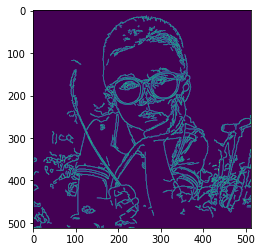

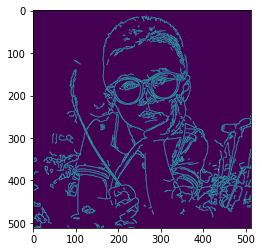

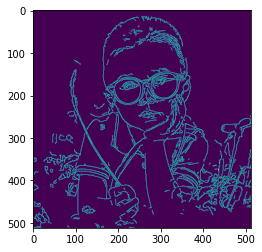

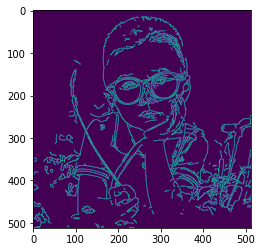

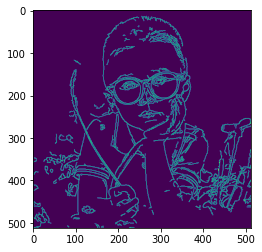

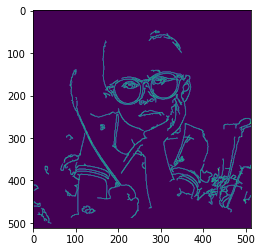

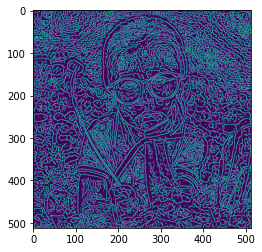

In [ ]:
# Lemos a imaxe
src = cv2.imread('../data/sample.jpg', cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Imaxe non atopada")

edges = src.copy()
# Visualizamo as imaxes
cv2.namedWindow("Bordes", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Bordes", src)
# Barra do limiar inferior
cv2.createTrackbar( "Limiar inferior", "Bordes", lowThreshold,
            maxThreshold, updateLowThreshold)
  
# Barra do limiar superior
cv2.createTrackbar( "Limiar superior", "Bordes", highThreshold,
            maxThreshold, updateHighThreshold)
  
# Barra do tamanho de apertura
cv2.createTrackbar( "Tamanho da apertura", "Bordes", apertureIndex,
            maxapertureIndex, updateApertureIndex)
  
# Barra do suavizado
cv2.createTrackbar( "Suavizado", "Bordes", blurAmount, maxBlurAmount,
            updateBlurAmount)
k = cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()

## <font style="color:rgb(50,120,229)">Explora en profundidade os parámetros de Canny</font>

Se xogas o suficiente co código proporcionado nesta sección, notarás o seguinte sobre diferentes parámetros:

1. **Limiar Baixo:** Mantendo todos os demais parámetros constantes, cando baixas o Limiar Baixo, os bordes rotos tenden a conectarse. Se o aumentas, os bordes continuos poden romper.

2. **Limiar alto:** Mantendo todos os demais parámetros constantes, cando aumenta Limiar Alto, detectaranse menos arestas. Por outra banda, diminuír o umbral elevado detecta máis bordes.

3. **Tamanho da apertura:** Aumentar o tamaño da apertura leva a moitos máis bordes. Isto débese simplemente a que os núcleos máis grandes de Sobel devolven valores de gradiente maiores. Os limiares baixo e alto deben cambiarse cando se modifica o tamaño da abertura.

4. **Cantidade de suavizado:** Cando se aumenta a cantidade de suavizado, redúcese o ruído na imaxe e elimínanse os bordes falsos. Como resultado, detéctanse menos arestas.